<a href="https://colab.research.google.com/github/andrewcgaitskell/voila/blob/master/notebooks/bqplotinteract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building interactive plots using `bqplot` and `ipywidgets`

* `bqplot` is built on top of the `ipywidgets` framework
* `ipwidgets` and `bqplot` widgets can be seamlessly integrated to build interactive plots
* `bqplot` figure widgets can be stacked with UI controls available in `ipywidgets` by using `Layout` classes (Box, HBox, VBox) in `ipywidgets`
(Note that *only* `Figure` objects (not `Mark` objects) inherit from `DOMWidget` class and can be combined with other widgets from `ipywidgets`)
* Trait attributes of widgets can be linked using callbacks. Callbacks should be registered using the `observe` method

Please follow these links for detailed documentation on:
1. [Layout and Styling of Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html)
*  [Linking Widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html)

<br>Let's look at examples of linking plots with UI controls

In [1]:
import os
x = os.getcwd()
if x == '/content':
  !pip install bqplot

In [2]:
import numpy as np

In [3]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
#import bqplot.pyplot as plt
%matplotlib inline

Update the plot on a button click

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of <Figure size 432x288 with 1 Axes> <class 'matplotlib.figure.Figure'> was specified.

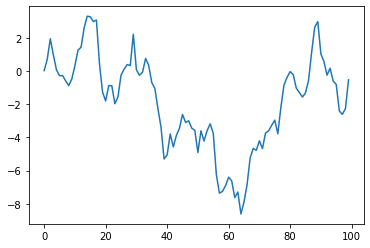

In [5]:
y = np.random.randn(100).cumsum() # simple random walk

# create a button
update_btn = widgets.Button(description='Update', button_style='success')

# create a figure widget
fig1 = plt.figure()
line = plt.plot(y)

# define an on_click function
def on_btn_click(btn):
    # update the y attribute of line mark
    line.y = np.random.randn(100).cumsum() # another random walk

# register the on_click function
update_btn.on_click(on_btn_click)
    
# stack button and figure using VBox
widgets.VBox([fig1, update_btn])

Let's look at an example where we link a plot to a dropdown menu

In [ ]:
import pandas as pd

# create a dummy time series for 5 dummy stock tickers
dates = pd.date_range(start='20180101', end='20181231')
n = len(dates)
tickers = list('ABCDE')
prices = pd.DataFrame(np.random.randn(n, 5).cumsum(axis=0), columns=tickers)

In [ ]:
# create a dropdown menu for tickers
dropdown = widgets.Dropdown(description='Ticker', options=tickers)

# create figure for plotting time series
current_ticker = dropdown.value
fig_title_tmpl = '"{}" Time Series' # string template for title of the figure 
#fig2 = plt.figure(title=fig_title_tmpl.format(current_ticker))
fig2.layout.width = '900px'
time_series = plt.plot(dates, prices[current_ticker])
plt.xlabel('Date')
plt.ylabel('Price')

# 1. create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    selected_ticker = dropdown.value
    
    # update the y attribute of the mark by selecting 
    # the column from the price data frame
    time_series.y = prices[selected_ticker]
    
    # update the title of the figure
    fig2.title = fig_title_tmpl.format(selected_ticker)

# 2. register the callback by using the 'observe' method
dropdown.observe(update_plot, 'value')

# stack the dropdown and fig widgets using VBox
widgets.VBox([dropdown, fig2])

Let's now create a scatter plot where we select X and Y data from the two dropdown menus

In [ ]:
# create two dropdown menus for X and Y attributes of scatter
x_dropdown = widgets.Dropdown(description='X', options=tickers, value='A')
y_dropdown = widgets.Dropdown(description='Y', options=tickers, value='B')

# create figure for plotting the scatter
x_ticker = x_dropdown.value
y_ticker = y_dropdown.value

# set up fig_margin to allow space to display color bar
fig_margin = dict(top=20, bottom=40, left=60, right=80)
#fig3 = plt.figure(animation_duration=1000, fig_margin=fig_margin)

# custom axis options for color data
axes_options = {'color': {'tick_format': '%m/%y', 
                          'side': 'right',
                          'num_ticks': 5}}
scatter = plt.scatter(x=prices[x_ticker], 
                      y=prices[y_ticker],
                      # color=dates, # represent chronology using color scale
                      #stroke='black',
                      #colors=['red']#,
                      #default_size=32#,
                      #axes_options=axes_options
                      )
plt.xlabel(x_ticker)
plt.ylabel(y_ticker)

# 1. create a callback which updates the plot when dropdown item is selected
def update_scatter(*args):
    x_ticker = x_dropdown.value
    y_ticker = y_dropdown.value
    
    # update the x and y attributes of the mark by selecting
    # the column from the price data frame
    with scatter.hold_sync():
        scatter.x = prices[x_ticker]
        scatter.y = prices[y_ticker]
    
    # update the title of the figure
    plt.xlabel(x_ticker)
    plt.ylabel(y_ticker)

# 2. register the callback by using the 'observe' method
x_dropdown.observe(update_scatter, 'value')
y_dropdown.observe(update_scatter, 'value')

# stack the dropdown and fig widgets using VBox
widgets.VBox([widgets.HBox([x_dropdown, y_dropdown]), fig3])